## Medal Tally Overall Analysis

In this analysis, we will be counting the number of medals (gold, silver and bronze) for each country and each year. We are also plotting the appropriate graphs in order to better visualize our analysis. The usage of this analysis is that, we can understand the performance of each country on the basis of number of medals won. The pattern of medal winning can also be infered by looking at the graphs. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Loading the Asian Games medal list dataset.

df_asian = pd.read_csv("Medal_List_Asian.csv")

In [4]:
##Truncating the '.0' from the years column. (converting 2018.0 to 2018)

df_asian["Year"] = [int(x) for x in df_asian["Year"].tolist()]
df_asian = df_asian.astype({"Year":object})
df_asian.rename(columns = {"Nation":"Country"},inplace=True)

In [5]:
##Earlier china was know as "Republic of china" and sri lanka was known as "Ceylon", hence changing their names as per the new 
##conventions.

df_asian.replace("Republic of China","China",inplace=True)
df_asian.replace("Ceylon","Sri Lanka",inplace=True)
df_asian.replace("Field hockey","Hockey",inplace=True)

In [6]:
##Loading the Olympics games medal list dataset.

df_oly = pd.read_csv("Medal_List_Olympics.csv")
df_oly.replace("Field hockey","Hockey",inplace=True)

In [7]:
## This is the block of code in which i am calculating the number of medals won by the asian counties in both "Asian" and 
##"Olympic" games.
##This is the helper funtion that will take the inputs as game : which game to analyze, country: which country to provide the
##analysis for and year: which year to consider for analysis.

def Helper1(game,game_df,country,year): 
     
    li3=[]
    df = game_df[game_df["Year"] == year]  ##Filtering the dataframe according to the input given by the user.
    countries = df["Country"].unique().tolist()  ##Collecting the names of the countries in a list.
    for nation in countries:  ##For every country i am calculating the sum of gold,silver,bronze seperately and also sum of all medals.
        df_c = df[df["Country"] == nation]
        li3.append((nation,year,df_c["Gold"].sum(),df_c["Silver"].sum(),df_c["Bronze"].sum(),df_c["Total"].sum()))
    li3.sort(key=lambda x : x[2],reverse=True)  ##Reverse sorting the list with respect to the number of gold medals won.
    ans3_df = pd.DataFrame(li3,columns=["Country","Year","Gold","Silver","Bronze","Total"])

    
    li4=[]
    countries = game_df["Country"].unique().tolist()
    for nation in countries:  ##Doing same as above, but here i am considering all years and calculating the number of medals won by a country in total.
        df_c = game_df[game_df["Country"] == nation]
        li4.append((nation,df_c["Gold"].sum(),df_c["Silver"].sum(),df_c["Bronze"].sum(),df_c["Total"].sum()))
    li4.sort(key=lambda x : x[1],reverse=True)  ##Reverse sorting the list with respect to the number of gold medals won.
    ans4_df = pd.DataFrame(li4,columns=["Country","Gold","Silver","Bronze","Total"])
    
    
    li5=[]
    years = game_df["Year"].unique().tolist()
    df_c = game_df[game_df["Country"] == country]
    for y in years:   ##Here for each country i am calculating the number of medals won year wise.
        df_y = df_c[df_c["Year"] == y]
        li5.append((country,y,df_y["Gold"].sum(),df_y["Silver"].sum(),df_y["Bronze"].sum(),df_y["Total"].sum()))
    li5.sort(key=lambda x : x[1],reverse=False)   ##Sorting the list with year.
    ans5_df = pd.DataFrame(li5,columns=["Country","Year","Gold","Silver","Bronze","Total"])
    

   
    if(year == "All years"):
        ##Plotting the bar graph and returning the dataframe if the user inputs year as "All years"
        fig = plt.figure(figsize = (15, 5))
        sns.barplot(ans5_df["Year"],ans5_df["Total"])
        plt.xticks(rotation = 45)
        plt.title("No Of Medals Won By "+country+" Year Wise in "+game+" Games",fontsize = 20)
        plt.xlabel("Year",fontsize=15)
        plt.ylabel("Total Medals",fontsize=15)
        for i in range(len(ans5_df["Year"].values)):  ##Adding labels to bars in bar graph.
            plt.text(i,ans5_df["Total"].values[i],ans5_df["Total"].values[i],ha='center')
        return (ans5_df,plt)
    
    elif(country == "Overall" and year != "Overall"):
    ##Plotting the bar graph and returning the dataframe if the user inputs year and wants the analysis for all the countries
        fig = plt.figure(figsize = (15, 5))
        sns.barplot(ans3_df["Country"],ans3_df["Total"])
        plt.xticks(rotation = 90)
        plt.title("No Of Medals Won in "+str(year),fontsize = 20)
        plt.xlabel("Countries",fontsize=15)
        plt.ylabel("Total Medals",fontsize=15)
        for i in range(len(ans3_df["Country"].values)):  ##Adding labels to bars in bar graph.
            plt.text(i,ans3_df["Total"].values[i],ans3_df["Total"].values[i],ha='center')
        return (ans3_df,plt)
    
    elif(country == "Overall" and year == "Overall"):
    ##Plotting the bar graph and returning the dataframe if the user inputs year as overall and wants the analysis for all the countries
        fig = plt.figure(figsize = (15, 5))
        sns.barplot(ans4_df["Country"],ans4_df["Total"])
        plt.xticks(rotation = 90)
        plt.title("No Of Medals Won By Each Country in "+game+" Games",fontsize = 20)
        plt.xlabel("Countries",fontsize=15)
        plt.ylabel("Total Medals",fontsize=15)
        for i in range(len(ans4_df["Country"].values)):  ##Adding labels to bars in bar graph.
            plt.text(i,ans4_df["Total"].values[i],ans4_df["Total"].values[i],ha='center')
        return (ans4_df,plt)
    
    elif(country != "Overall" and year == "Overall"):
    ##Returning the total number of medals won by a country(user input).
        return ans4_df[ans4_df["Country"] == country]
    
    elif(country != "Overall" and year != "Overall"):
    ##Returning the total number of medals won by a country(user input) in a particular year(user input).
        return ans3_df[ans3_df["Country"] == country]
    
    
def Medal_Tally(game,country,year):  ##This is the main function that will be called as soon as the user inputs something.
    
    if(game == "Asian"):  ##If the user wants the analysis for asian games then we call the helper function by proving it with asian games dataset.
        return Helper1(game,df_asian.copy(),country,year)
    elif(game == "Olympics"):  ##If the user wants the analysis for olympic games then we call the helper function by proving it with olympic games dataset.
        return Helper1(game,df_oly.copy(),country,year)
    elif(game == "Both"):  ##In this case the helper function will be called twice first for asian games and then for olympic games.
        return (Helper1("Asian",df_asian.copy(),country,year),Helper1("Olympics",df_oly.copy(),country,year))

C:\Users\Deepak Raj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


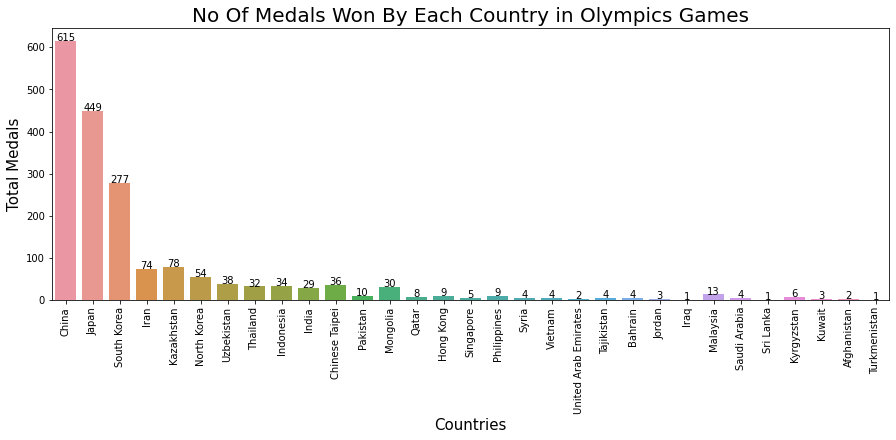

In [8]:
df,fig = Medal_Tally("Olympics","Overall","Overall")

In [9]:
Medal_Tally("Asian","India","Overall")

,Country,Gold,Silver,Bronze,Total
5,India,154,198,317,669


In [10]:
Medal_Tally("Olympics","India","Overall")

,Country,Gold,Silver,Bronze,Total
9,India,6,7,16,29


C:\Users\Deepak Raj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


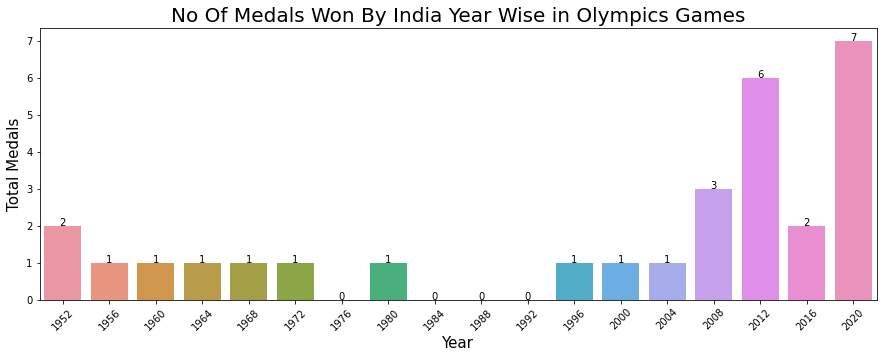

In [11]:
df,fig = Medal_Tally("Olympics","India","All years")

C:\Users\Deepak Raj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


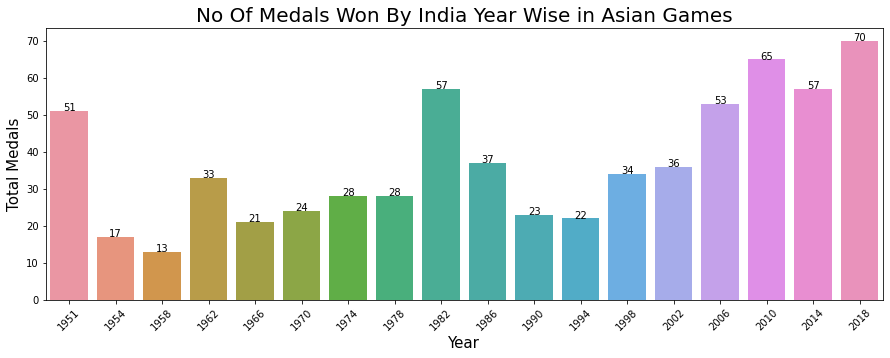

In [12]:
df,fig = Medal_Tally("Asian","India","All years")